## Looking at the differences in coefficients

In [1]:
import matplotlib as mpl
from pathlib import Path
import yaml

plot_config_path = '../src/plot_configs.yaml'
with open(plot_config_path, 'r') as stream:
    rc_fonts = yaml.safe_load(stream)
rc_fonts['figure.figsize'] = tuple(rc_fonts['figure.figsize'])
mpl.rcParams.update(rc_fonts)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import esig
esig.set_backend("iisignature")
import pickle
import itertools

In [3]:
def twolists(l1, l2):
    return [x for x in itertools.chain.from_iterable(itertools.zip_longest(l1, l2)) if x is not None]


def find_true_coeffs(var_level, t_level=None, A=-2):
    
    if not t_level:
        t_level = var_level
    
    time_coeffs = [(A)**(i) for i in range(1, t_level+1)]
    var_coeffs = [(A)**(i-1) for i in range(1, var_level+1)]
    
    coeffs = twolists(time_coeffs, var_coeffs)
    coeffs.insert(0, 1)
    
    return coeffs

def find_R(F, var, H):
    return(F+np.sqrt(F**2+var*H**2))/(H**2)

def find_A(F, H, R):
    return F-R*H**2

In [4]:
F = -1
var = 2
H = 10
R = find_R(F, var, H)
A = find_A(F, H, R)

## Full model

We start by looking at the differences in coefficients when the truncation level is set to 6 

In [5]:
true_coeffs = find_true_coeffs(var_level=6, t_level=6, A=A)

In [6]:
output_dir = '../results/simulation/'
loaded_model = pickle.load(open(f'{output_dir}/signature_model.pkl', 'rb'))

In [7]:
df_sigs = pd.read_csv(output_dir+'/sig_data.csv')
data_matrix = df_sigs.to_numpy()

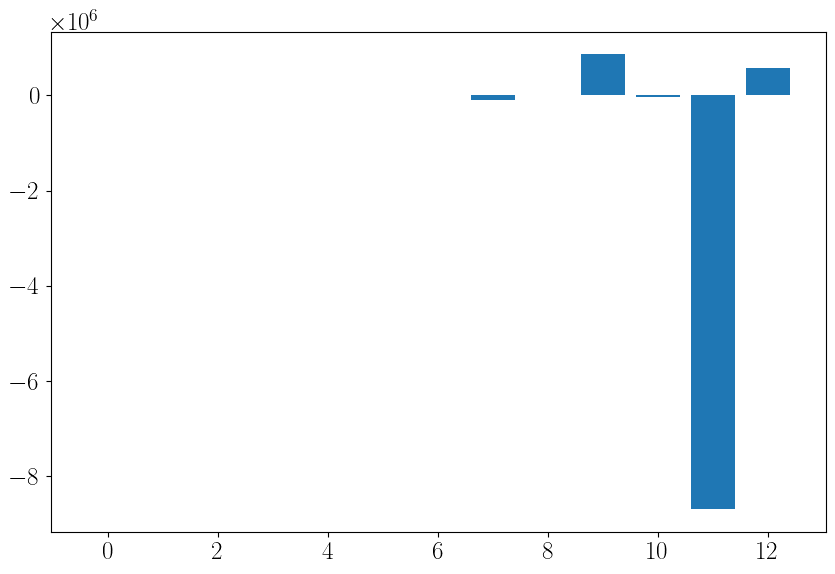

In [8]:
plt.bar(np.arange(len(true_coeffs))[:], (loaded_model.coef_-true_coeffs)[:])
plt.savefig('coeff_diff.pdf', bbox_inches='tight')

We check the eigenvalues of the data matrix

In [9]:
np.linalg.eig(data_matrix.T@data_matrix)[0]

array([1.32624096e+04, 2.31138024e+02, 1.34187874e+01, 1.43917687e+00,
       6.68248057e-01, 9.37473599e-03, 6.70884859e-03, 5.19041517e-05,
       2.02198884e-05, 1.65791470e-07, 3.48531399e-08, 3.31440365e-10,
       3.44748241e-13])

## Reducing the signature levels

We next look at the differences in coefficients when we reduce the truncation level to 3 in the observation and to 1 for the time.

In [10]:
import sys
sys.path.append('../src')
from simulation_main import main

In [ ]:
! python src/simulation_rerun.py

In [10]:
true_coeffs = find_true_coeffs(var_level=3, t_level=1, A=A)

In [11]:
output_dir = '../results/simulation_reduce/'
loaded_model = pickle.load(open(f'{output_dir}/signature_model.pkl', 'rb'))

In [12]:
df_sigs = pd.read_csv(output_dir+'/sig_data.csv')
data_matrix = df_sigs.to_numpy()

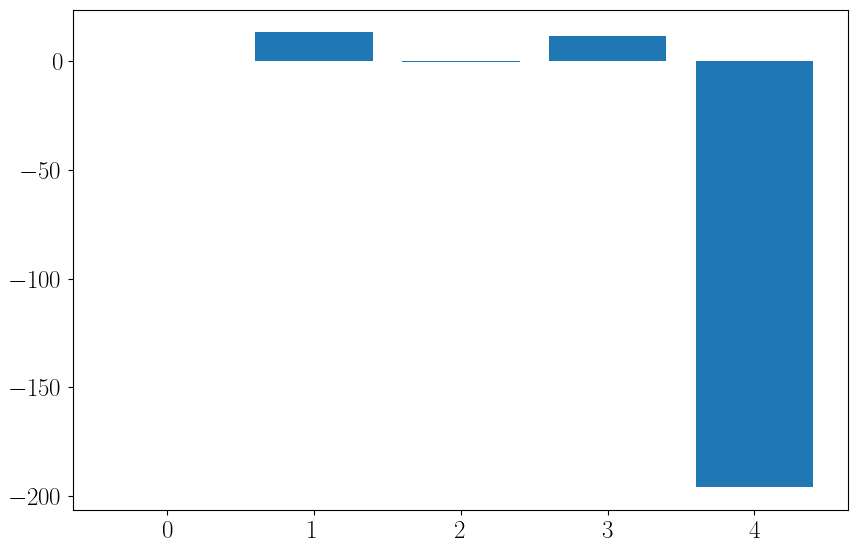

In [13]:
plt.bar(np.arange(len(true_coeffs))[:], (loaded_model.coef_-true_coeffs)[:])
plt.savefig('coeff_diff2.pdf', bbox_inches='tight')

We check the eigenvalues of the data matrix

In [14]:
np.linalg.eig(data_matrix.T@data_matrix)[0]

array([1.32599482e+04, 2.29265374e+02, 1.29948520e+01, 5.12696729e-01,
       1.21304409e+00])